<a href="https://colab.research.google.com/github/urieliram/statistical/blob/main/Tarea14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [52]:
#https://drive.google.com/drive/folders/1Gj3XK9kM-lE18uBMe3qrZOGEm8yAI8i9
#https://www.codegrepper.com/code-examples/python/how+to+read+csv+file+from+google+drive+on+google+colab+
path         = 'https://drive.google.com/uc?export=download&id=' 
URL_EMBALSES = 'https://drive.google.com/file/d/1GJTg0J5W-061Dh8O4bNNCBiMpHwlCr9L/view?usp=sharing'
df_EMBALSES  = pd.read_csv(path + URL_EMBALSES.split('/')[-2]) #, usecols=[0,1,4], names=['CLVUNI','TYPE','NODE']

In [53]:
X = df_EMBALSES.to_numpy()
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [61]:
CYAN = '#76ced6' ; LILA = '#777bd4'; VERDE='#17cb49'; LETRASNARA='#ff8000'; AZUL='#168fff'; OTROAZUL = "b-"; ROJO= "r-";
def print_serie(serie_,title_,ytitle_,xtitle_,namefile_):
    fig, ax1 = plt.subplots(figsize=(7,4))
    plt.title(title_,fontsize='x-large',color=LETRASNARA)
    ax1.set_xlabel(xtitle_, color=LETRASNARA, fontsize='large')
    ax1.set_ylabel(ytitle_, color=LETRASNARA, fontsize='large')
    plt.tick_params(colors = LETRASNARA, which='both')
    ax1.spines['bottom'].set_color(LETRASNARA)
    ax1.spines['top'   ].set_color(LETRASNARA) 
    ax1.spines['right' ].set_color(LETRASNARA)
    ax1.spines['left'  ].set_color(LETRASNARA)    
    plt.plot(pca_n.explained_variance_ratio_)
    plt.savefig(namefile_, transparent=True)         
    plt.show()

99.99999999999997
[7.24653606e+01 1.03348283e+01 5.39070486e+00 3.05839934e+00
 2.61913849e+00 1.73694960e+00 1.62113795e+00 1.21208977e+00
 9.71673914e-01 3.55559090e-01 2.10996754e-01 2.28559165e-02
 3.05493802e-04 4.48078293e-31]


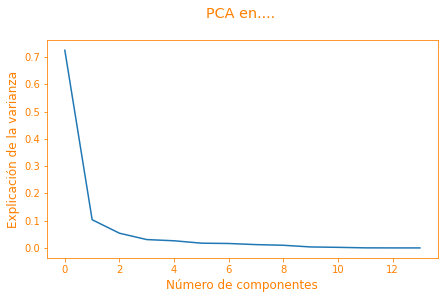

In [64]:
pca_n = PCA(n_components=14)
pca_n.fit(X)
x_pca_n = pca_n.transform(X)
print(sum(pca_n.explained_variance_ratio_ * 100))
print(pca_n.explained_variance_ratio_ * 100)
print_serie(pca_n.explained_variance_ratio_,'PCA en.... \n','Explicación de la varianza','Número de componentes','fig_t14__variance_pca')
